# Wine Quality Classification
#### Diondra Stubbs
#### CSC 310 Assignment 7
#### 2022 October 26

## Dataset Description

This dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. More about this dataset: https://archive.ics.uci.edu/ml/datasets/wine

#### Dataset Features
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline

In [2]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import metrics as skmetrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [3]:
wine_quality_url = 'https://raw.githubusercontent.com/rhodyprog4ds/07-classification-stubbsdiondra/main/wine.data?token=GHSAT0AAAAAAB2K2A2ATUZW2BJ3OLPZBJLEY2ZPKYQ'
wine_df = pd.read_csv(wine_quality_url)
wine_df

HTTPError: HTTP Error 404: Not Found

In [13]:
columns = ['quality','Alcohol','Malic_acid','Ash','Alcalinity',
          'Magnesium','Total_phenols','Flavanoids',
          'Nonflavanoid_phenols','Proanthocyanins',
          'Color_intensity','Hue','OD280_OD315',
          'Proline']

wine_df = wine_df = pd.read_csv(wine_quality_url, names = columns, sep = ',', header = None)

In [14]:
wine_df

quality  Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
0          1    14.23        1.71  2.43        15.6        127           2.80   
1          1    13.20        1.78  2.14        11.2        100           2.65   
2          1    13.16        2.36  2.67        18.6        101           2.80   
3          1    14.37        1.95  2.50        16.8        113           3.85   
4          1    13.24        2.59  2.87        21.0        118           2.80   
..       ...      ...         ...   ...         ...        ...            ...   
173        3    13.71        5.65  2.45        20.5         95           1.68   
174        3    13.40        3.91  2.48        23.0        102           1.80   
175        3    13.27        4.28  2.26        20.0        120           1.59   
176        3    13.17        2.59  2.37        20.0        120           1.65   
177        3    14.13        4.10  2.74        24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280_OD315  Proline  
0           3.92     1065  
1           3.40     1050  
2           3.17     1185  
3           3.45     1480  
4           2.93      735  
..           ...      ...  
173         1.74      740  
174         1.56      750  
175         1.56      835  
176         1.62      840  
177         1.60      560  

[178 rows x 14 columns]

## Classification Task
The task is to predict the quality of the wine from the measurements. I am going to attempt building an automatic wine classifier that, for measurements of a new wine returns the predicted quality. 

The DataFrame has columns for quality, alcohol,	malic acid, ash, alcalinity, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color intensity, hue, OD280_OD315, and proline. The target variable (chosen classifier) will be the quality of the wine.

In [30]:
feature_vars = features
target_var = 'quality'

## Exploratory Data Analysis

In [31]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity            178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280_OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [32]:
wine_df.describe()

quality     Alcohol  Malic_acid         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_intensity         Hue  OD280_OD315      Proline  
count       178.000000  178.000000   178.000000   178.000000  
mean          5.058090    0.957449     2.611685   746.893258  
std           2.318286    0.228572     0.709990   314.907474  
min           1.280000    0.480000     1.270000   278.000000  
25%           3.220000    0.782500     1.937500   500.500000  
50%           4.690000    0.965000     2.780000   673.500000  
75%           6.200000    1.120000     3.170000   985.000000  
max          13.000000    1.710000     4.000000  1680.000000

In [33]:
wine_df['quality'].value_counts()

2    71
1    59
3    48
Name: quality, dtype: int64

Here we will look at the distribution of features. This pair plot shows the distribution of the target variable quality. 

There is not a ton of overlap for the different qualities of each wine. I would like to assume that the data is reasonably seperable. The features mostly are shaped like symmetrical bell curves and their are no skewed distributions. Therefore the features are normally (Gaussian) distributed. 

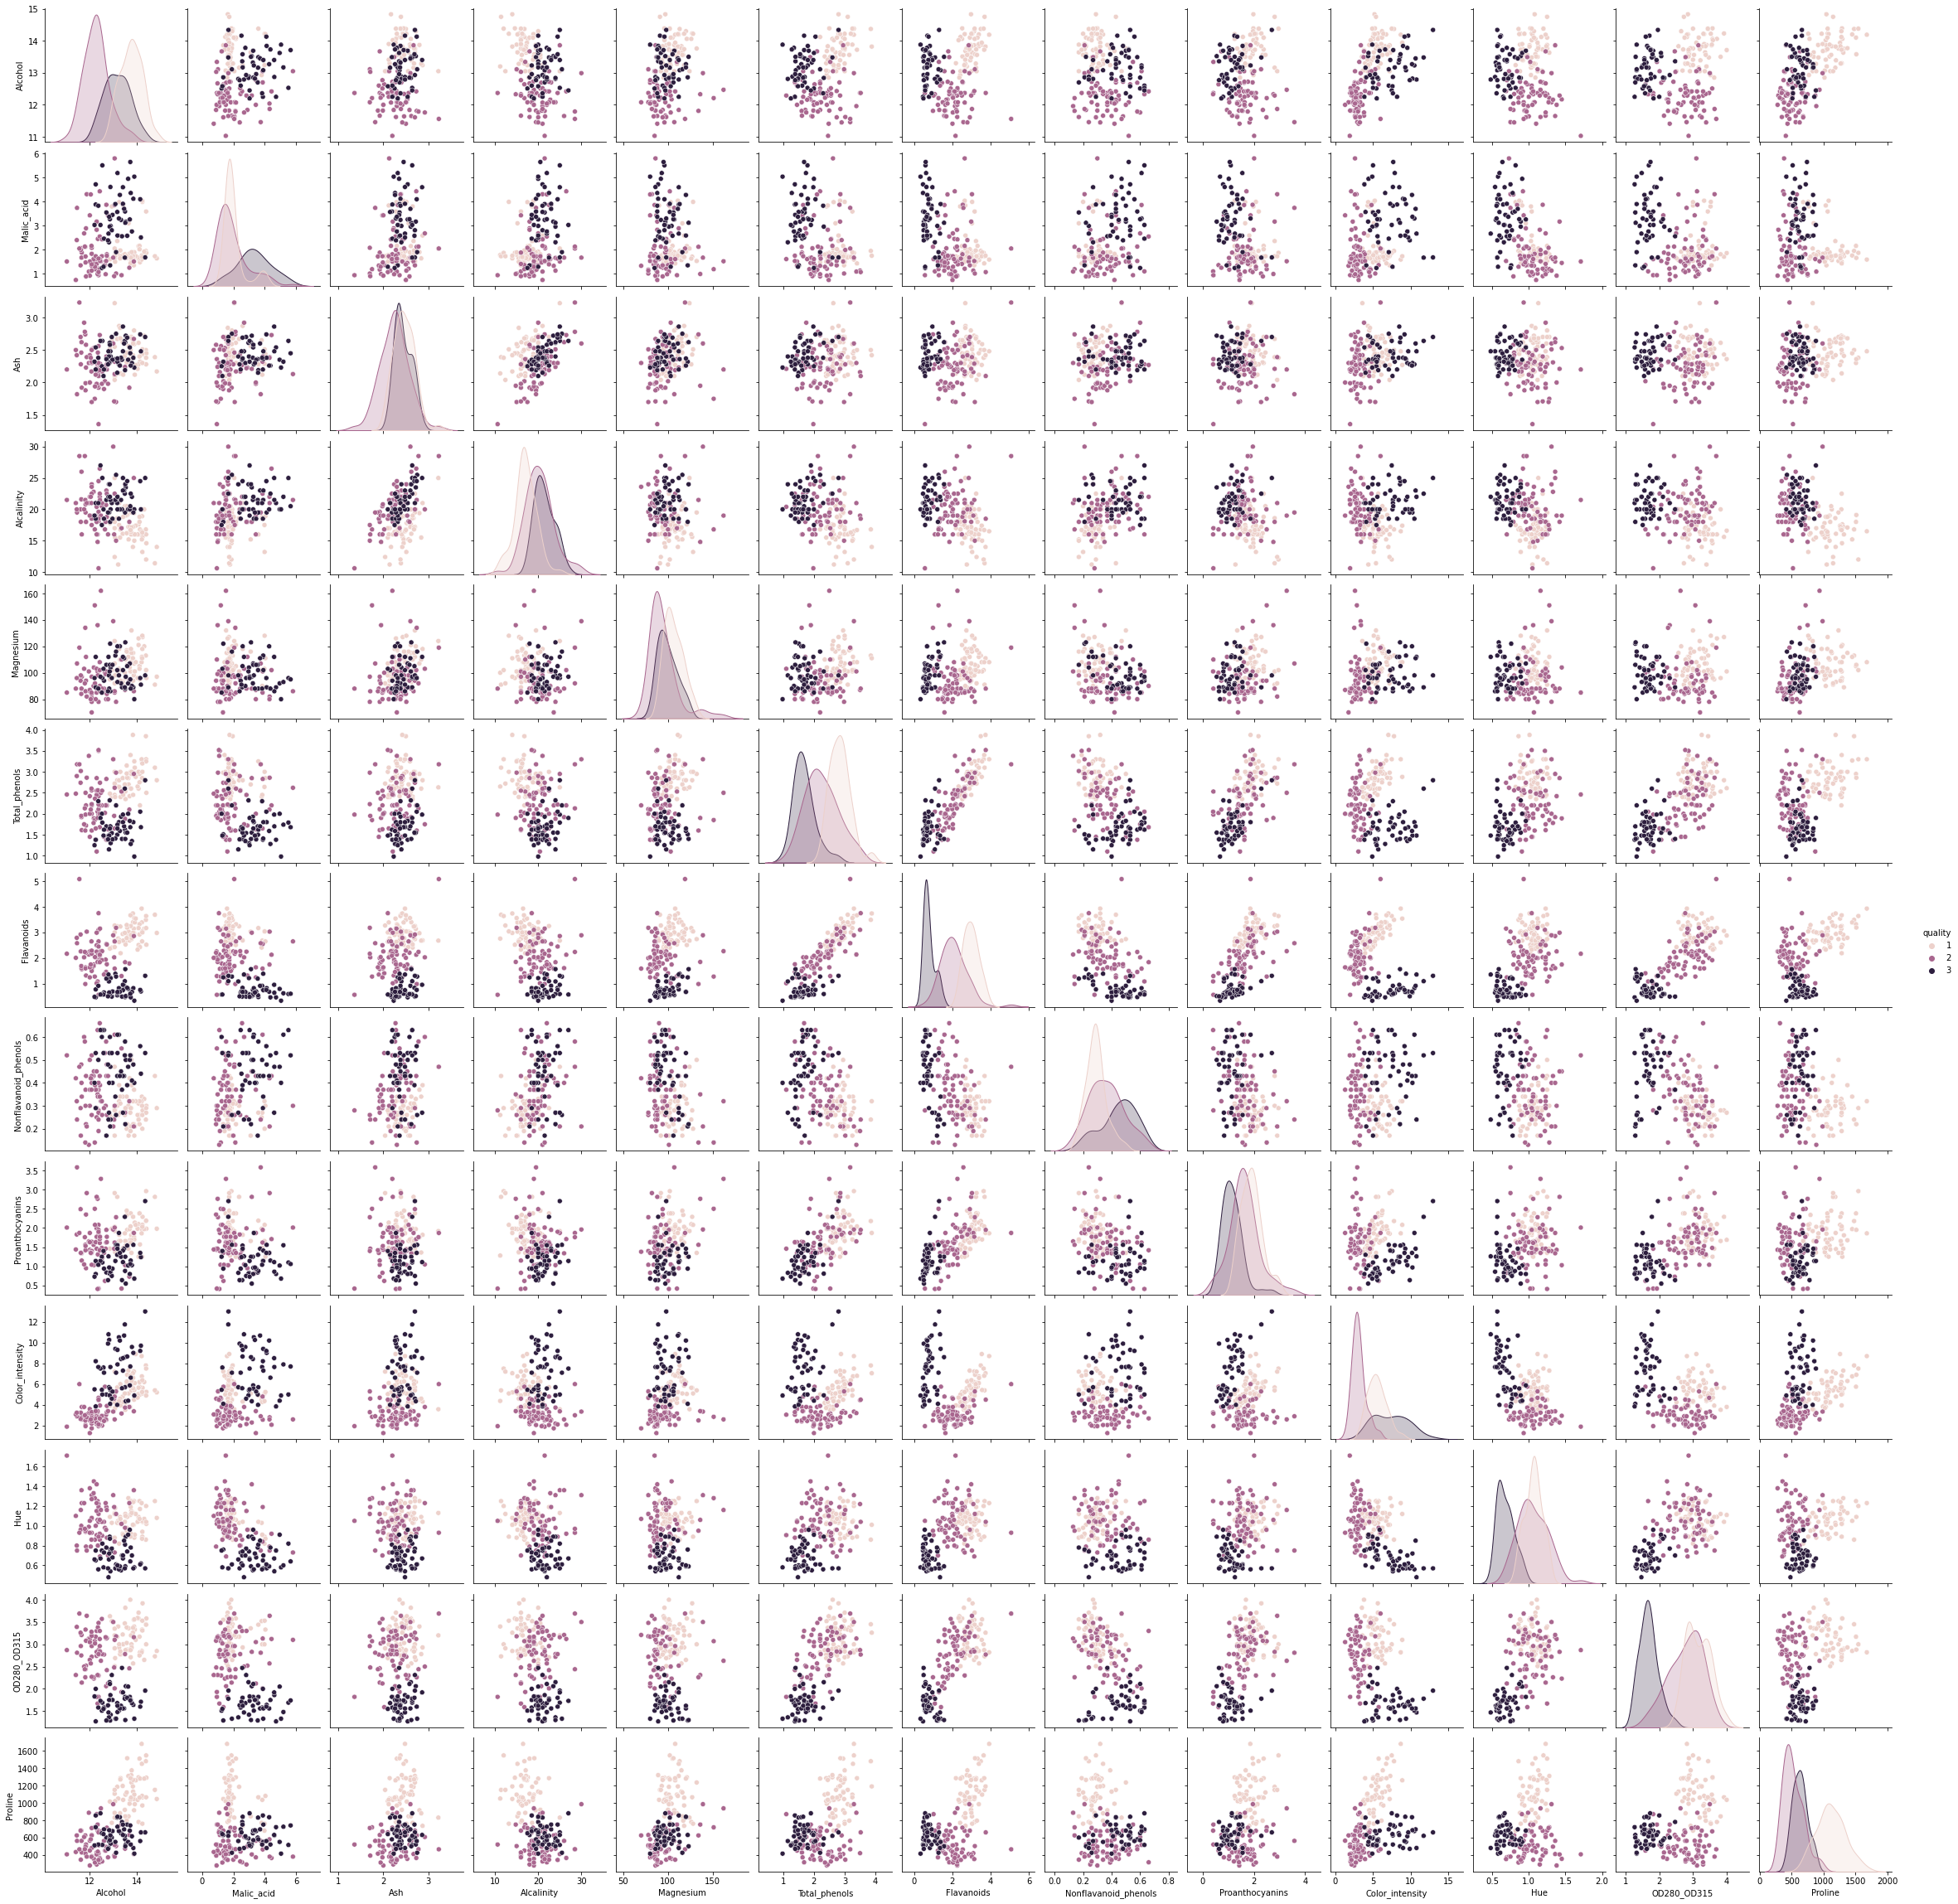

In [39]:
sns.pairplot(data = wine_df, hue = target_var)

Gaussian Naive Bayes is a more reasonable model since the features are normally distributed.

## Classification

In [26]:
X_train, X_test, y_train, y_test = train_test_split(wine_df[feature_vars],wine_df[target_var], test_size = 0.5, random_state=0)

In [28]:
X_test.shape

(89, 13)

In [29]:
X_train.head()

Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
69    12.21        1.19  1.75        16.8        151           1.85   
49    13.94        1.73  2.27        17.4        108           2.88   
48    14.10        2.02  2.40        18.8        103           2.75   
85    12.67        0.98  2.24        18.0         99           2.20   
13    14.75        1.73  2.39        11.4         91           3.10   

    Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
69        1.28                  0.14             2.50             2.85  1.28   
49        3.54                  0.32             2.08             8.90  1.12   
48        2.92                  0.32             2.38             6.20  1.07   
85        1.94                  0.30             1.46             2.62  1.23   
13        3.69                  0.43             2.81             5.40  1.25   

    OD280_OD315  Proline  
69         3.07      718  
49         3.10     1260  
48         2.75     1060  
85         3.16      450  
13         2.73     1150

In [37]:
wine_df.head()

quality  Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
0        1    14.23        1.71  2.43        15.6        127           2.80   
1        1    13.20        1.78  2.14        11.2        100           2.65   
2        1    13.16        2.36  2.67        18.6        101           2.80   
3        1    14.37        1.95  2.50        16.8        113           3.85   
4        1    13.24        2.59  2.87        21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280_OD315  Proline  
0         3.92     1065  
1         3.40     1050  
2         3.17     1185  
3         3.45     1480  
4         2.93      735

In [36]:
X_train.shape, wine_df.shape

((89, 13), (178, 14))

In [38]:
89/178

0.5

We get 50% of the samples in the training set

In [40]:
gnb = GaussianNB()

In [41]:
gnb.__dict__

{'priors': None, 'var_smoothing': 1e-09}

In [42]:
gnb.fit(X_train,y_train)

GaussianNB()

Fitting the Gaussian Naive Bayes

In [43]:
gnb.__dict__

{'priors': None,
 'var_smoothing': 1e-09,
 'n_features_in_': 13,
 'epsilon_': 9.661248049488699e-05,
 'classes_': array([1, 2, 3], dtype=int64),
 'theta_': array([[1.37741176e+01, 1.98647059e+00, 2.45823529e+00, 1.66764706e+01,
         1.05441176e+02, 2.85852941e+00, 3.00529412e+00, 2.91176471e-01,
         1.89588235e+00, 5.58676471e+00, 1.07176471e+00, 3.17705882e+00,
         1.11211765e+03],
        [1.22270968e+01, 1.81225806e+00, 2.24096774e+00, 2.03580645e+01,
         9.53870968e+01, 2.10612903e+00, 1.94838710e+00, 3.81935484e-01,
         1.61645161e+00, 2.99516129e+00, 1.08019355e+00, 2.79612903e+00,
         5.30419355e+02],
        [1.31383333e+01, 3.45416667e+00, 2.48791667e+00, 2.20625000e+01,
         1.00625000e+02, 1.69000000e+00, 8.12916667e-01, 4.41250000e-01,
         1.10208333e+00, 7.08291667e+00, 6.89166667e-01, 1.65791667e+00,
         6.19375000e+02]]),
 'sigma_': array([[2.06756128e-01, 4.68748862e-01, 5.42346748e-02, 7.10777827e+00,
         1.02658401e+02, 

In [44]:
# Using EDA to find the mean and variance of each feature for each quality
wine_grouped = wine_df.groupby('quality')

In [45]:
wine_grouped[columns].mean()

quality    Alcohol  Malic_acid       Ash  Alcalinity   Magnesium  \
quality                                                                     
1            1.0  13.744746    2.010678  2.455593   17.037288  106.338983   
2            2.0  12.278732    1.932676  2.244789   20.238028   94.549296   
3            3.0  13.153750    3.333750  2.437083   21.416667   99.312500   

         Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
quality                                                                     
1             2.840169    2.982373              0.290000         1.899322   
2             2.258873    2.080845              0.363662         1.630282   
3             1.678750    0.781458              0.447500         1.153542   

         Color_intensity       Hue  OD280_OD315      Proline  
quality                                                       
1               5.528305  1.062034     3.157797  1115.711864  
2               3.086620  1.056282     2.785352   519.507042  
3               7.396250  0.682708     1.683542   629.895833

In [47]:
wine_grouped[columns].var()

quality   Alcohol  Malic_acid       Ash  Alcalinity   Magnesium  \
quality                                                                    
1            0.0  0.213560    0.474100  0.051604    6.483758  110.227937   
2            0.0  0.289406    1.031380  0.099520   11.220962  280.679678   
3            0.0  0.281156    1.183539  0.034110    5.099291  118.602394   

         Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
quality                                                                     
1             0.114895    0.158001              0.004907         0.169834   
2             0.297419    0.498014              0.015366         0.362486   
3             0.127428    0.086145              0.015411         0.167147   

         Color_intensity       Hue  OD280_OD315       Proline  
quality                                                        
1               1.534063  0.013568     0.127504  49071.450029  
2               0.855494  0.041183     0.246585  24715.367807  
3               5.340454  0.013097     0.074045  13247.329344

This model has an accuracy score of ~ 94%.

In [53]:
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.9438202247191011

In [84]:
y_pred = gnb.predict(X_test)

In [85]:
confusion_matrix(y_test, y_pred) 

array([[25,  0,  0],
       [ 3, 35,  2],
       [ 0,  0, 24]], dtype=int64)

This Gaussian Naive Bayes Classifier model works well meaning that the parameters fit the data well.

In [80]:
# generating synthetic data
N = 20
gnb_df = pd.DataFrame(np.concatenate([np.random.multivariate_normal(th, sig*np.eye(13),N)
         for th, sig in zip(gnb.theta_,gnb.sigma_)]),
         columns = feature_vars)
gnb_df['quality'] = [ci for cl in [[c]*N for c in gnb.classes_] for ci in cl]

In [82]:
gnb_df.head()

Alcohol  Malic_acid       Ash  Alcalinity   Magnesium  Total_phenols  \
0  12.584088    0.754010  2.355333   20.861352   95.909525       3.047116   
1  13.495675    0.878081  2.628236   14.270044  112.411005       3.682512   
2  14.019652    2.161565  2.625067   16.436534  109.727361       3.332131   
3  14.681676    2.275909  2.135059   13.909784  108.167660       2.563902   
4  14.237885    1.656460  2.569141   14.311765  111.145266       3.311937   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity  \
0    3.743915              0.355318         1.816757         6.864401   
1    3.222527              0.334063         2.044625         5.060833   
2    3.313275              0.306581         1.779933         6.640440   
3    2.749652              0.281150         2.122327         7.333529   
4    3.413942              0.341746         2.581101         5.046716   

        Hue  OD280_OD315      Proline  quality  
0  1.146060     3.088791  1263.786239        1  
1  1.020147     2.756062  1126.233206        1  
2  1.151886     3.049408  1060.139422        1  
3  0.948248     3.413976   869.340592        1  
4  1.142218     3.503286  1355.721927        1

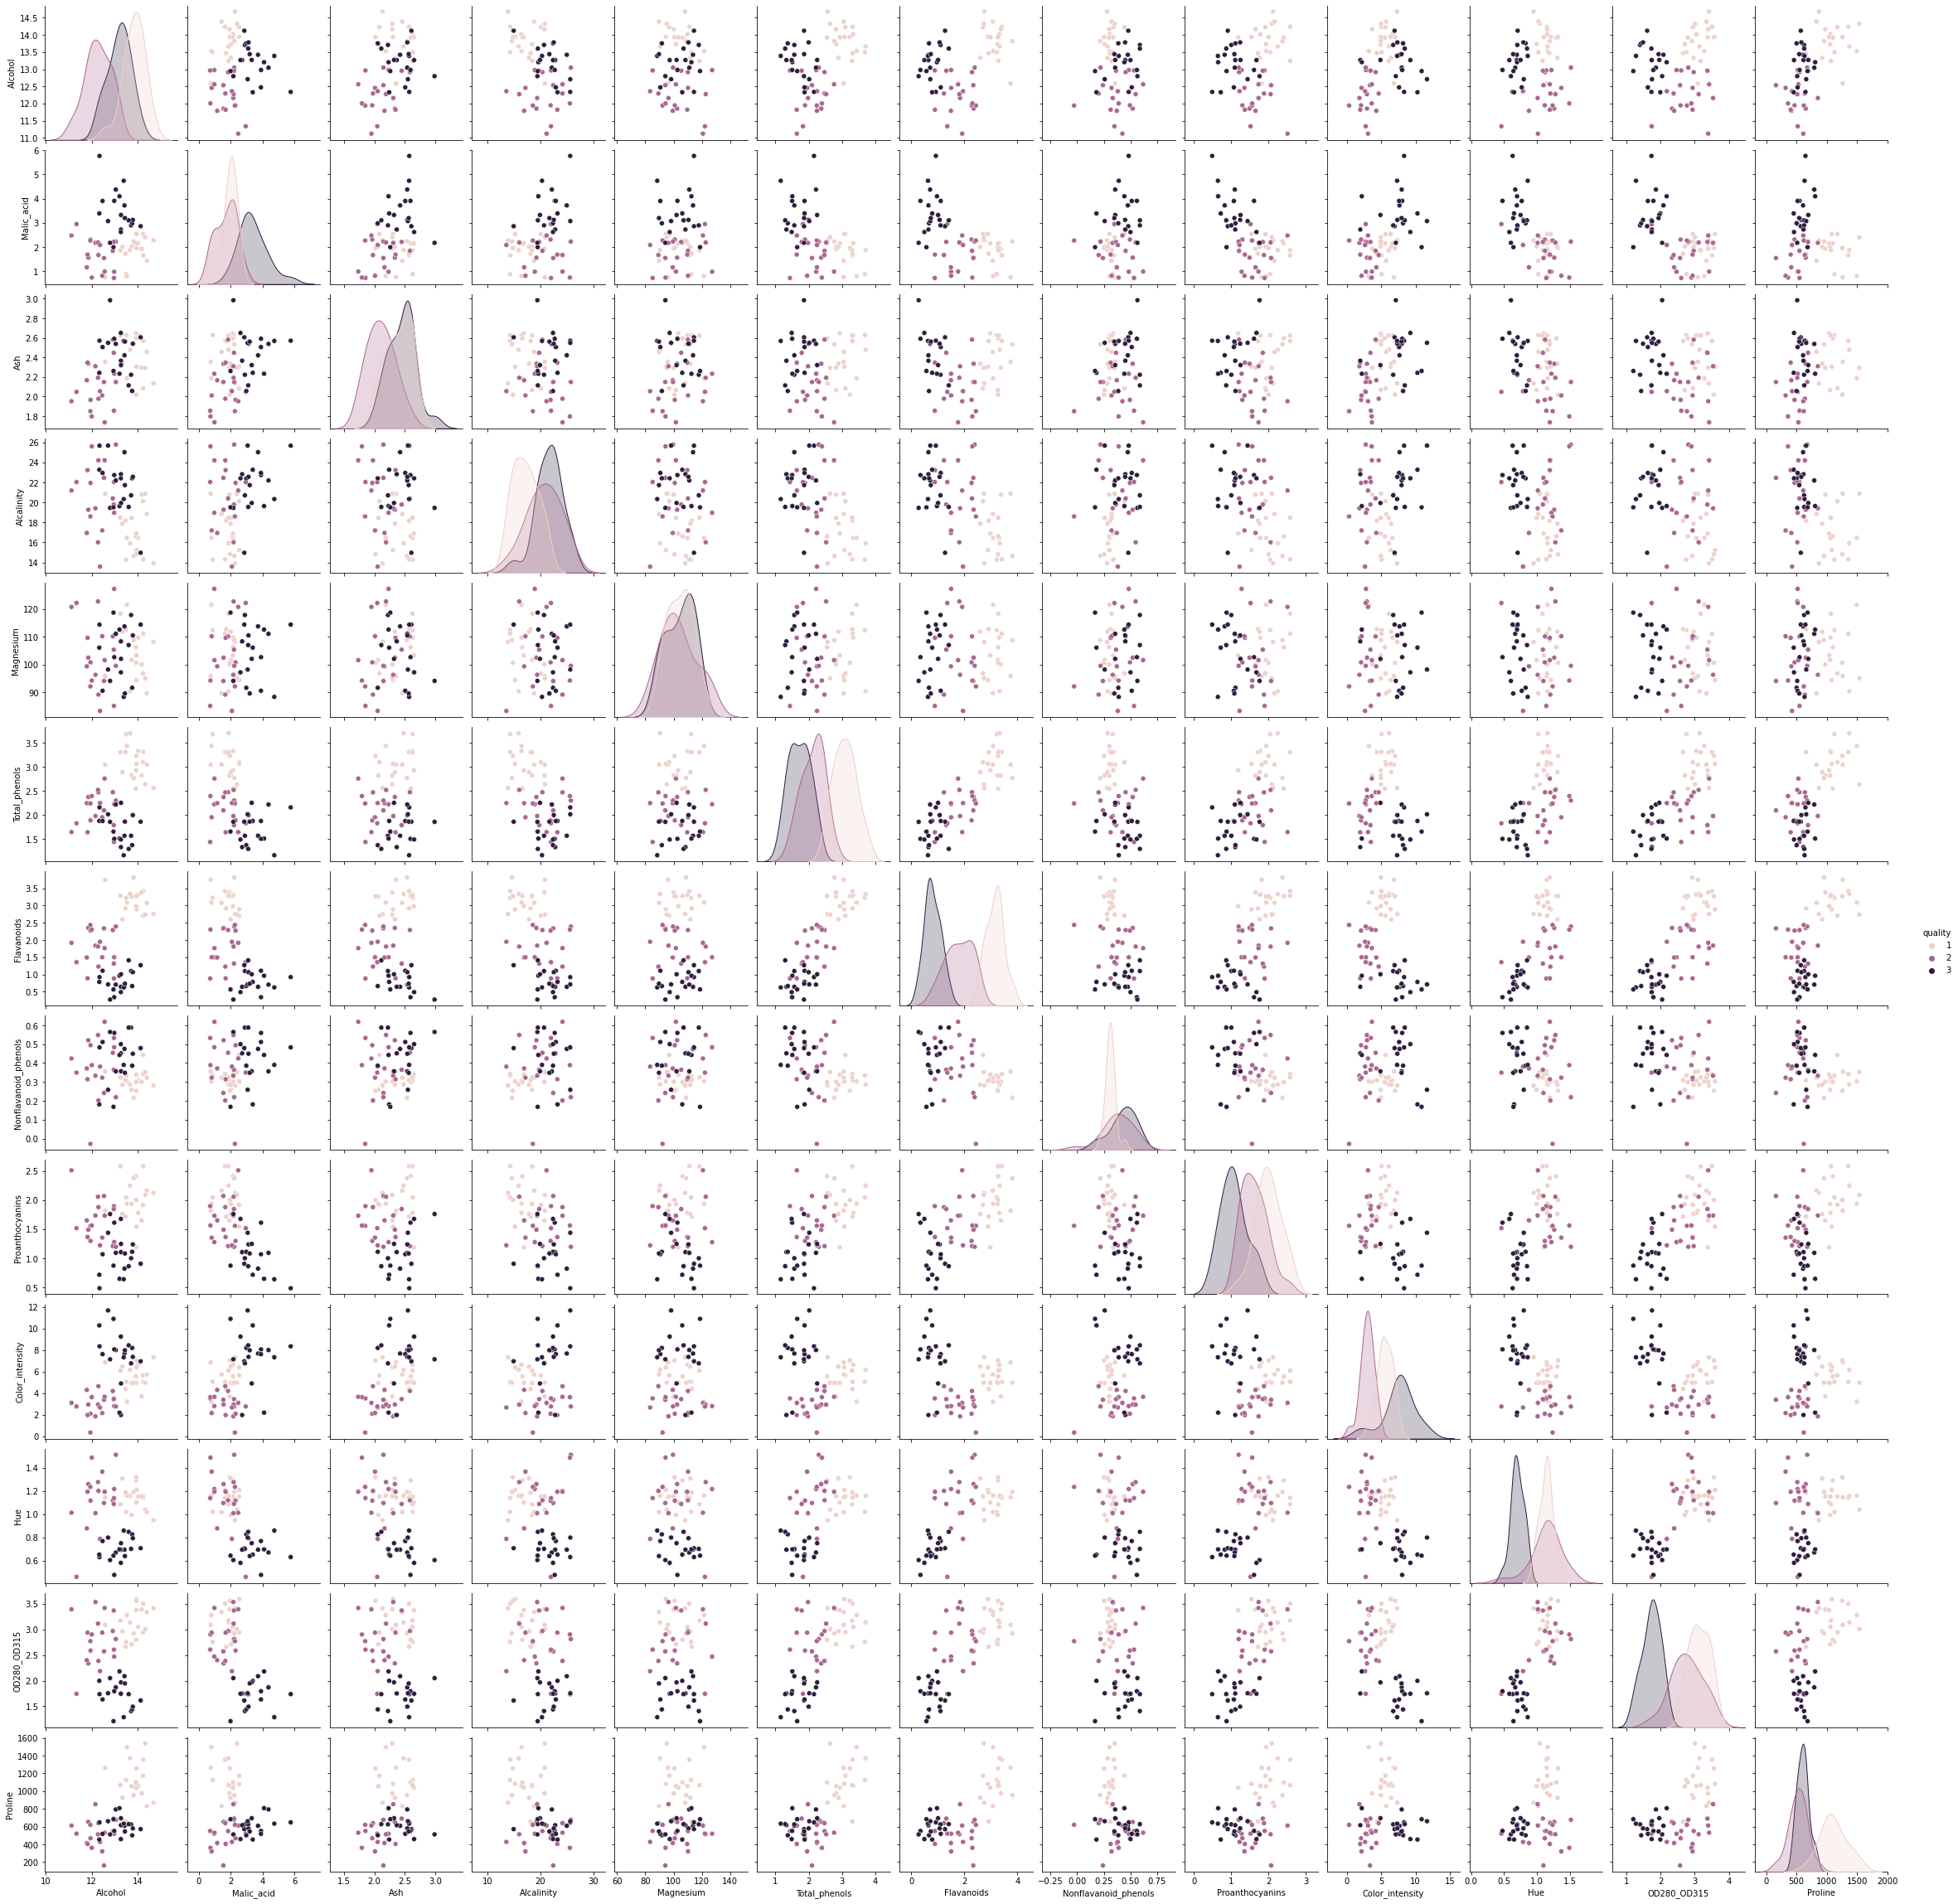

In [83]:
sns.pairplot(data =gnb_df, hue='quality')

This looks pretty close to the actual data, though there is more overlap for the different qualities in each scatter plot. This means that the naive assumption doesn’t hold perfectly on this data.

The parameters do generate similar synthetic data.

What if we used a Decision Tree?

In [56]:
dt = tree.DecisionTreeClassifier()

In [57]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
dt.score(X_test,y_test)

0.8876404494382022

The accuracy score is lower. Therefore the Gaussian Naive Bayes was a more reasonable model.

##### Repeat the split, train, and test steps 5 times to use 5 different random splits of the data, save the scores into a dataframe. Compute the mean and std of the scores.

In [98]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(wine_df[feature_vars],wine_df[target_var], random_state=0)

In [99]:
X_train1.head()

Alcohol  Malic_acid   Ash  Alcalinity  Magnesium  Total_phenols  \
19     13.64        3.10  2.56        15.2        116           2.70   
135    12.60        2.46  2.20        18.5         94           1.62   
74     11.96        1.09  2.30        21.0        101           3.38   
144    12.25        3.88  2.20        18.5        112           1.38   
16     14.30        1.92  2.72        20.0        120           2.80   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
19         3.03                  0.17             1.66             5.10  0.96   
135        0.66                  0.63             0.94             7.10  0.73   
74         2.14                  0.13             1.65             3.21  0.99   
144        0.78                  0.29             1.14             8.21  0.65   
16         3.14                  0.33             1.97             6.20  1.07   

     OD280_OD315  Proline  
19          3.36      845  
135         1.58      695  
74          3.13      886  
144         2.00      855  
16          2.65     1280

In [102]:
X_train1.shape, wine_df.shape

((133, 13), (178, 14))

In [103]:
133/178

0.7471910112359551

We can see that we get ~75% of the samples in the training set

In [104]:
gnb.fit(X_train1,y_train1)

GaussianNB()

In [105]:
y_pred = gnb.predict(X_test1)

In [106]:
gnb.score(X_test1,y_test1)

0.9333333333333333

In [107]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(wine_df[feature_vars],wine_df[target_var], test_size = 0.33, random_state=0)

In [108]:
X_train2.shape, wine_df.shape

((119, 13), (178, 14))

In [109]:
119/178

0.6685393258426966

We get ~69% of the samples in the training set

In [111]:
y_pred = gnb.predict(X_test2)
gnb.score(X_test2,y_test2)

0.9491525423728814

In [113]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(wine_df[feature_vars],wine_df[target_var], test_size = 0.75, random_state=0)
X_train3.shape, wine_df.shape

((44, 13), (178, 14))

In [114]:
44/178

0.24719101123595505

We get ~25% of the samples in the training set

In [115]:
y_pred = gnb.predict(X_test3)
gnb.score(X_test3,y_test3)

0.9701492537313433

In [121]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(wine_df[feature_vars],wine_df[target_var], test_size = 0.90, random_state=0)
X_train4.shape, wine_df.shape

((17, 13), (178, 14))

In [123]:
17/178

0.09550561797752809

We get ~10% of the samples in the training set

In [124]:
y_pred = gnb.predict(X_test4)
gnb.score(X_test4,y_test4)

0.968944099378882

In [125]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(wine_df[feature_vars],wine_df[target_var], test_size = 0.22, random_state=0)
X_train5.shape, wine_df.shape

((138, 13), (178, 14))

In [126]:
138/178

0.7752808988764045

We get ~78% of the samples in the training set

In [127]:
y_pred = gnb.predict(X_test5)
gnb.score(X_test5,y_test5)

0.925

It seems that the closer you are to 25% samples, the higher accuracy score you get for the classifier model. At 25% of samples, the score is 97%.

#### Saving the scores into a dataframe

In [128]:
data = [gnb.score(X_test1,y_test1), gnb.score(X_test2,y_test2), gnb.score(X_test3,y_test3), gnb.score(X_test4,y_test4), gnb.score(X_test5,y_test5)]

In [130]:
df = pd.DataFrame(data, columns = ['Accuracy Scores'])
df

Accuracy Scores
0         0.933333
1         0.949153
2         0.970149
3         0.968944
4         0.925000

In [131]:
df['Accuracy Scores'].mean()

0.949315845763288

In [132]:
df['Accuracy Scores'].std()

0.020408496725117294

The mean of the accuracy scores is ~95% which is fairly close to the accuracy score of the original model with 50% of the data. The standard deviation is fairly small indicating that the values tend to be close to the mean, thus very reliable. 

I believe that this model is good enough for real use since the classification accuracy score is high. Howver, I would seek alternative models that would give an even better classification score indicating an even better classifier. 

## Exploring Problem Setups

In [159]:
X_train10, X_test10, y_train10, y_test10 = train_test_split(wine_df[feature_vars],wine_df[target_var], test_size = 0.10, random_state=0)
X_train10.shape, X_test10.shape, wine_df.shape

((160, 13), (18, 13), (178, 14))

In [151]:
d1 = gnb.score(X_train10,y_train10)
d1

0.975

In [152]:
d2 = gnb.score(X_test10,y_test10)
d2

0.9444444444444444

In [157]:
X_train30, X_test30, y_train30, y_test30 = train_test_split(wine_df[feature_vars],wine_df[target_var], test_size = 0.30, random_state=0)
X_train30.shape, X_test30.shape, wine_df.shape

((124, 13), (54, 13), (178, 14))

In [153]:
d3 = gnb.score(X_train30,y_train30)
d3

0.9838709677419355

In [154]:
d4 = gnb.score(X_test30,y_test30)
d4

0.9444444444444444

In [158]:
X_train90, X_test90, y_train90, y_test90 = train_test_split(wine_df[feature_vars],wine_df[target_var], test_size = 0.90, random_state=0)
X_train90.shape, X_test90.shape, wine_df.shape

((17, 13), (161, 13), (178, 14))

In [155]:
d5 = gnb.score(X_train90,y_train90)
d5

1.0

In [156]:
d6 = gnb.score(X_test90,y_test90)
d6

0.968944099378882

In [165]:
data2 = {'train_pct':[.10, .30, .90],'n_train_samples':[160, 124,17], 'n_test_samples':[18,54,161], 
         'train_acc':[d1,d3,d5], 'test_acc':[d2,d4,d6]}

In [166]:
explore_df = pd.DataFrame(data2)

In [167]:
explore_df

train_pct  n_train_samples  n_test_samples  train_acc  test_acc
0        0.1              160              18   0.975000  0.944444
1        0.3              124              54   0.983871  0.944444
2        0.9               17             161   1.000000  0.968944

<AxesSubplot:xlabel='train_acc'>

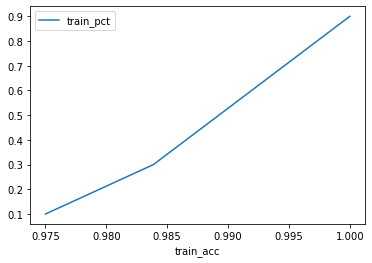

In [178]:
explore_df.plot( x='train_acc', y ='train_pct')

<AxesSubplot:xlabel='test_acc'>

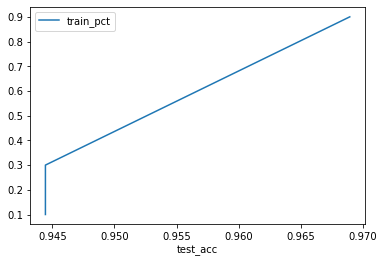

In [179]:
explore_df.plot( x='test_acc', y ='train_pct')

When the training percentage is increased, the test samples increase and the train samples decrease. As the training percentage increases, the training accuracy is better than the test accuracy even though both are increasing. 